In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

In [114]:
class SGDRegressor:
    def __init__(self, fit_intercept=True, normalize=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        
        Parameters
        ----------
        X : DataFrame
            Features
            
        Returns
        -------
        DataFrame
            Features with ones in the first column.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
            
    def _compute_loss(self):
        m = self.X.shape[0]
        h = np.dot(self.X, self.theta)
        loss =np.sum((h - y) ** 2) / (2 * m)
        return loss
    
    def _compute_hypothesis(self, theta):
        return np.dot(self.X, theta)
            
    def _descend_gradient(self, alpha, num_iter):
        m = self.X.shape[0]
        num_features = self.X.shape[1]
        theta = np.zeros((num_features, 1))
        
        for i in range(num_iter):
            h = self._compute_hypothesis(theta)
            error = h - y
            temp_X = np.dot(error.T, self.X)
            theta = theta - (alpha / m)  * (temp_X.T)
        return theta

    def fit(self, X, y):
        if self.fit_intercept:
            self.X = self._add_intercept(X)
        
        self.theta = self._descend_gradient(alpha=0.01, num_iter=1000)
    
    def predict(self, x_test):
        x_test = np.array(x_test)
        x0_array = np.ones([self.X.shape[0], 1])
        x_test = np.concatenate((x0_array, x_test), axis=1)
        print(x_test)
        return np.dot(x_test, self.theta)

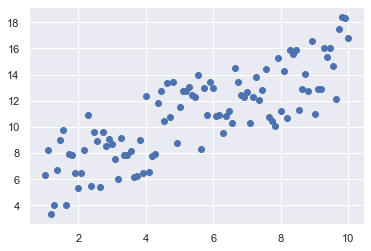

In [110]:
X = np.linspace(1, 10, 100)
errors = np.random.rand(100)
Y = 2 + X + 7*errors

plt.scatter(X, Y)

In [115]:
model = SGDRegressor()
model.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
y_pred = model.predict(X.reshape(-1, 1))

NameError: name 'y' is not defined

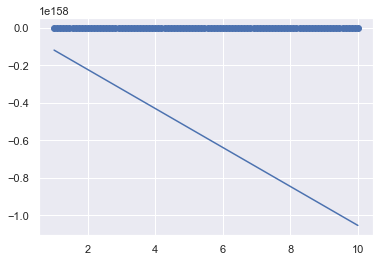

In [107]:
plt.scatter(X, Y)
plt.plot(X, y_pred)

In [108]:
model.theta

array([[-1.54660267e+156],
       [-1.03917438e+157]])